# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

clientes = pd.read_csv("demo01.csv")
clientes.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [29]:
clientes.sexo.unique()

array(['M', 'F'], dtype=object)

In [30]:
clientes.sexo.map

<bound method Series.map of 0        M
1        F
2        F
3        M
4        F
        ..
16645    F
16646    F
16647    M
16648    M
16649    F
Name: sexo, Length: 16650, dtype: object>

In [31]:
novo_sexo = pd.get_dummies(clientes["sexo"])
novo_posse_de_veiculo = pd.get_dummies(clientes["posse_de_veiculo"])
novo_posse_de_imovel = pd.get_dummies(clientes["posse_de_imovel"])
novo_tipo_renda = pd.get_dummies(clientes["tipo_renda"])
novo_educacao = pd.get_dummies(clientes["educacao"])
novo_estado_civil = pd.get_dummies(clientes["estado_civil"])
novo_tipo_residencia = pd.get_dummies(clientes["tipo_residencia"])

In [32]:
novo_df = pd.DataFrame()

In [33]:
novo_df["sexo M"] = novo_sexo["M"]
novo_df["sexo F"] = novo_sexo["F"]

novo_df["posse de veiculo N"] = novo_posse_de_veiculo["N"]
novo_df["posse de veiculo Y"] = novo_posse_de_veiculo["Y"]

novo_df["posse de  imovel Y"] = novo_posse_de_imovel["Y"]
novo_df["posse de imovel N"] = novo_posse_de_imovel["N"]

novo_df["renda Commercial associate"] = novo_tipo_renda["Commercial associate"]
novo_df["renda Pensioner"] = novo_tipo_renda["Pensioner"]
novo_df["renda State servant"] = novo_tipo_renda["State servant"]
novo_df["renda Student"] = novo_tipo_renda["Student"]
novo_df["renda Working"] = novo_tipo_renda["Working"]

novo_df["Educação Academic degree"] = novo_educacao["Academic degree"]
novo_df["Educação  Higher education"] = novo_educacao["Higher education"]
novo_df["Educação  Incomplete higher"] = novo_educacao["Incomplete higher"]
novo_df["Educação  secondary"] = novo_educacao["Lower secondary"]
novo_df["Educação  Secondary / secondary special"] = novo_educacao["Secondary / secondary special"]

novo_df["Estado civil Civil marriage"] = novo_estado_civil["Civil marriage"]
novo_df["Estado civil Married"] = novo_estado_civil["Married"]
novo_df["Estado civil Separated"] = novo_estado_civil["Separated"]
novo_df["Estado civil Single / not married"] = novo_estado_civil["Single / not married"]
novo_df["Estado civil Widow"] = novo_estado_civil["Widow"]

novo_df["Tipo de residencia Co-op apartment"] = novo_tipo_residencia["Co-op apartment"]
novo_df["Tipo de residencia House / apartment"] = novo_tipo_residencia["House / apartment"]
novo_df["Tipo de residencia Municipal apartment"] = novo_tipo_residencia["Municipal apartment"]
novo_df["Tipo de residencia Office apartment"] = novo_tipo_residencia["Office apartment"]
novo_df["Tipo de residencia Rented apartment"] = novo_tipo_residencia["Rented apartment"]
novo_df["Tipo de residencia With parents"] = novo_tipo_residencia["With parents"]

novo_df["Quantidade de filhos"] = clientes.qtd_filhos
novo_df["idade"] = clientes.idade
novo_df["tempo de emprego"] = clientes.tempo_emprego
novo_df["possui celular"] = clientes.possui_celular
novo_df["possui telefone comercial"] = clientes.possui_fone_comercial
novo_df["possui fone"] = clientes.possui_fone
novo_df["possui email"] = clientes.possui_email
novo_df["quantidade de pessoas na residência"] = clientes.qt_pessoas_residencia
novo_df["mau"] = clientes.mau

In [34]:
novo_df.shape

(16650, 36)

In [35]:
novo_df.isna().sum()

sexo M                                     0
sexo F                                     0
posse de veiculo N                         0
posse de veiculo Y                         0
posse de  imovel Y                         0
posse de imovel N                          0
renda Commercial associate                 0
renda Pensioner                            0
renda State servant                        0
renda Student                              0
renda Working                              0
Educação Academic degree                   0
Educação  Higher education                 0
Educação  Incomplete higher                0
Educação  secondary                        0
Educação  Secondary / secondary special    0
Estado civil Civil marriage                0
Estado civil Married                       0
Estado civil Separated                     0
Estado civil Single / not married          0
Estado civil Widow                         0
Tipo de residencia Co-op apartment         0
Tipo de re

In [36]:
novo_df

,sexo M,sexo F,posse de veiculo N,posse de veiculo Y,posse de imovel Y,posse de imovel N,renda Commercial associate,renda Pensioner,renda State servant,renda Student,...,Tipo de residencia With parents,Quantidade de filhos,idade,tempo de emprego,possui celular,possui telefone comercial,possui fone,possui email,quantidade de pessoas na residência,mau
0,True,False,False,True,True,False,False,False,False,False,...,False,0,58.832877,3.106849,1,0,0,0,2.0,False
1,False,True,True,False,True,False,True,False,False,False,...,False,0,52.356164,8.358904,1,0,1,1,1.0,False
2,False,True,True,False,True,False,True,False,False,False,...,False,0,52.356164,8.358904,1,0,1,1,1.0,False
3,True,False,False,True,True,False,False,False,False,False,...,False,0,46.224658,2.106849,1,1,1,1,2.0,False
4,False,True,False,True,False,True,False,False,False,False,...,False,0,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,False,True,True,False,True,False,False,False,False,False,...,False,0,54.109589,9.884932,1,0,0,0,2.0,True
16646,False,True,True,False,True,False,True,False,False,False,...,False,0,43.389041,7.380822,1,1,1,0,2.0,True
16647,True,False,False,True,True,False,False,False,False,False,...,False,0,30.005479,9.800000,1,1,0,0,2.0,True
16648,True,False,False,True,True,False,False,False,False,False,...,False,0,30.005479,9.800000,1,1,0,0,2.0,True


In [37]:
y = novo_df.mau
y

0        False
1        False
2        False
3        False
4        False
         ...  
16645     True
16646     True
16647     True
16648     True
16649     True
Name: mau, Length: 16650, dtype: bool

In [38]:
X = novo_df.drop("mau", axis=1)
X

,sexo M,sexo F,posse de veiculo N,posse de veiculo Y,posse de imovel Y,posse de imovel N,renda Commercial associate,renda Pensioner,renda State servant,renda Student,...,Tipo de residencia Rented apartment,Tipo de residencia With parents,Quantidade de filhos,idade,tempo de emprego,possui celular,possui telefone comercial,possui fone,possui email,quantidade de pessoas na residência
0,True,False,False,True,True,False,False,False,False,False,...,False,False,0,58.832877,3.106849,1,0,0,0,2.0
1,False,True,True,False,True,False,True,False,False,False,...,False,False,0,52.356164,8.358904,1,0,1,1,1.0
2,False,True,True,False,True,False,True,False,False,False,...,False,False,0,52.356164,8.358904,1,0,1,1,1.0
3,True,False,False,True,True,False,False,False,False,False,...,False,False,0,46.224658,2.106849,1,1,1,1,2.0
4,False,True,False,True,False,True,False,False,False,False,...,False,False,0,29.230137,3.021918,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,False,True,True,False,True,False,False,False,False,False,...,False,False,0,54.109589,9.884932,1,0,0,0,2.0
16646,False,True,True,False,True,False,True,False,False,False,...,False,False,0,43.389041,7.380822,1,1,1,0,2.0
16647,True,False,False,True,True,False,False,False,False,False,...,False,False,0,30.005479,9.800000,1,1,0,0,2.0
16648,True,False,False,True,True,False,False,False,False,False,...,False,False,0,30.005479,9.800000,1,1,0,0,2.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [46]:
# 2.1: Defina um objeto com a função da árvore de decisão vista em aula.

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

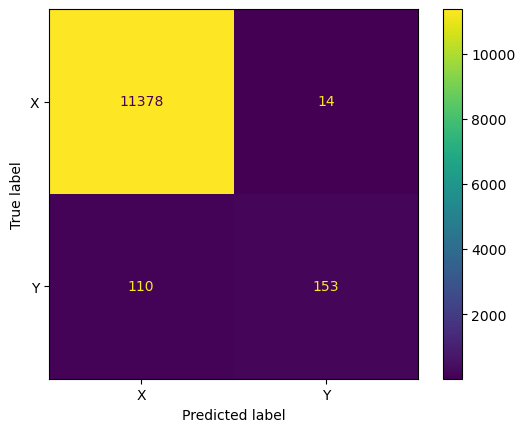

In [49]:
# 2.2: Treine o modelo com os dados que você separou para treinamento.

cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["X", "Y"])

MatrizDeConfusao.plot()

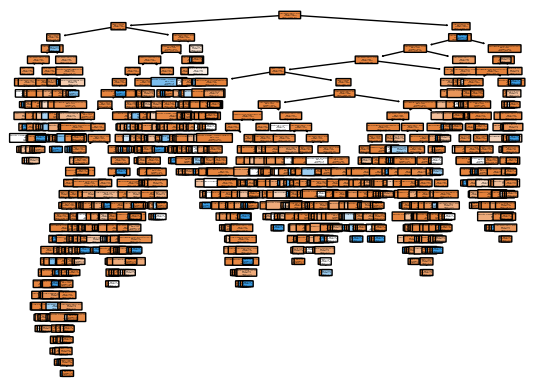

In [51]:
# 2.3: Visualize a árvore. Talvez você queira aumentar um pouco a figura.

plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=["X", "Y"],
         feature_names=list(X_train.columns));

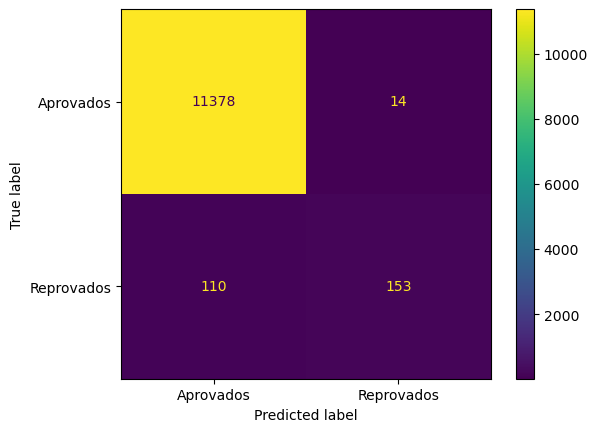

In [52]:
# 2.4: Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - 
# pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovados", "Reprovados"])

MatrizDeConfusao.plot()

In [53]:
# 2.5: Calcule a acurácia na base de treinamento
X_train.shape

(11655, 35)

In [54]:
# 2.5: Calcule a acurácia na base de treinamento
11378+14+110+153

11655

In [56]:
# 2.5: Calcule a acurácia na base de treinamento
total_acc = (11378 + 153)/11655
print(f"A acurácia da base de treinamento é {total_acc}")

A acurácia da base de treinamento é 0.9893607893607893


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

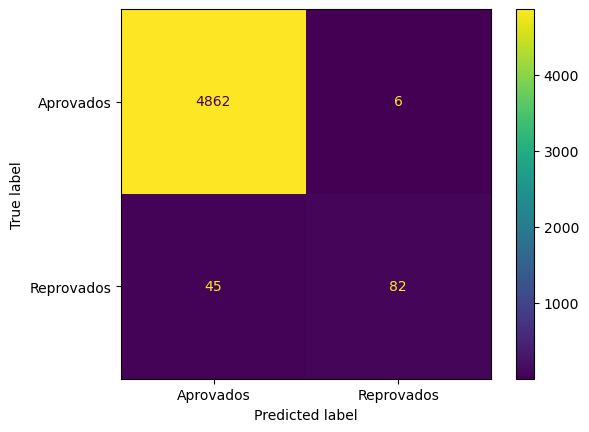

In [57]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao_teste = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovados", "Reprovados"])

MatrizDeConfusao_teste.plot()

In [59]:
num1 = 4862+6+45+82
total_acc_test = (4862 + 82)/num1
total_acc_test

0.9897897897897898

In [60]:
print("Ambas são bem altas, porém a acurácia da base de testes é maior um pouco do que a base de treino.")

Ambas são bem altas, porém a acurácia da base de testes é maior um pouco do que a base de treino.


In [64]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy_score(y_test, predict)

0.9727727727727727